## **Explanatory Data Analysis: Ford GoBike Usage**

### **By: Ameed Othman**

---

### **Introduction**

This notebook presents the findings from an analysis of the **Ford GoBike system** dataset for February 2019. The key focus is to explore trip durations, gender imbalances, and age-related insights to understand how different user types (Customers and Subscribers) behave while using the bike-sharing service.

The analysis will answer questions such as:
- What are the most common trip durations?
- How do trip durations differ by user demographics?
- Is there a gender imbalance in bike usage, and how does trip behavior differ between genders?
- What is the relationship between trip duration and age?

Let’s dive into the data and answer these questions using visualizations to explain the patterns.

### **Key Findings and Visualizations**
#### **1. What are the most common trip durations?**

Ford GoBike users tend to take relatively short trips. We calculated the mode, mean, and median trip durations, and segmented the data by user type (Customer vs. Subscriber).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

Text(0, 0.5, 'Trip Duration (seconds)')

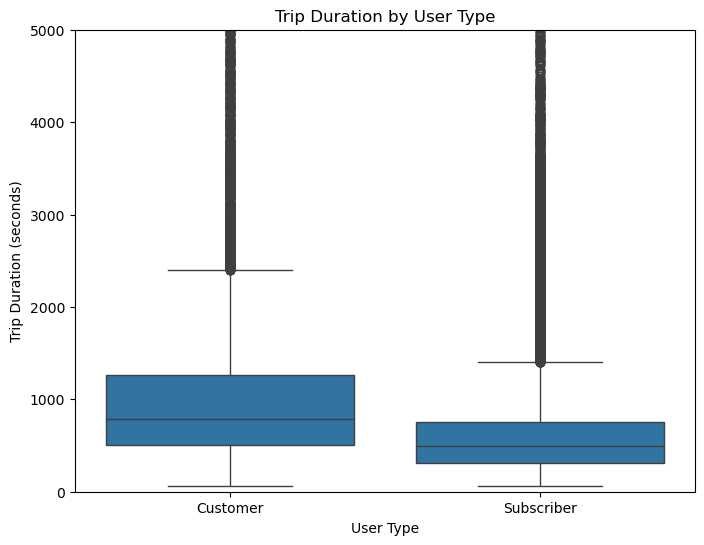

In [12]:
# Boxplot of Trip Durations by User Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='user_type', y='duration_sec')
plt.ylim([0, 5000])  # Focus on trips with duration less than 5000 seconds
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')

**Key Observations**:
- **Subscribers** take shorter trips on average than **Customers**, with a median trip duration of 490 seconds compared to 792 seconds for Customers.
- Customers show greater variability in trip lengths, with more outliers representing longer trips.
  
---

#### **2. Is there a significant gender imbalance in bike usage?**

Analyzing the gender distribution reveals that the majority of users are male.

Text(0, 0.5, 'Count')

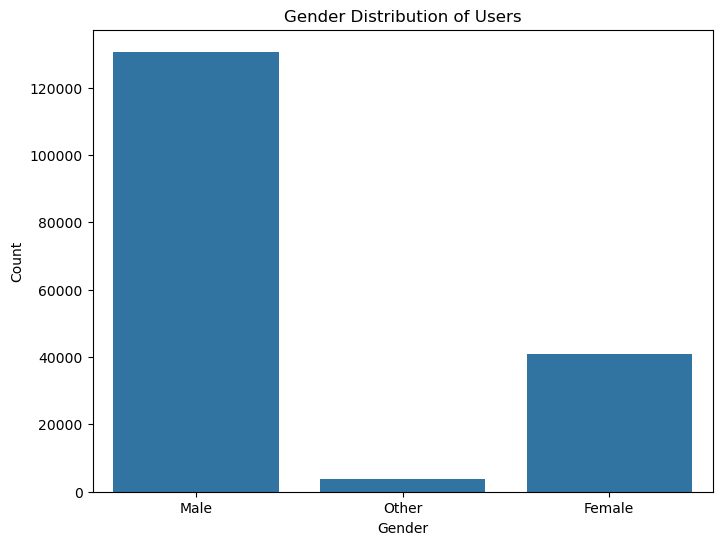

In [13]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='member_gender')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')


**Key Observations**:
- The dataset is dominated by **male** users, with over 120,000 males using the service.
- **Female** users represent a much smaller proportion, and the **Other** gender category is almost negligible in comparison.

---

#### **3. What is the relationship between trip duration and user age?**

We wanted to explore whether trip duration is influenced by age.

In [14]:
# Calculate age of users
current_year = 2019  # Assuming the dataset is from 2019
df['age'] = current_year - df['member_birth_year']

(0.0, 5000.0)

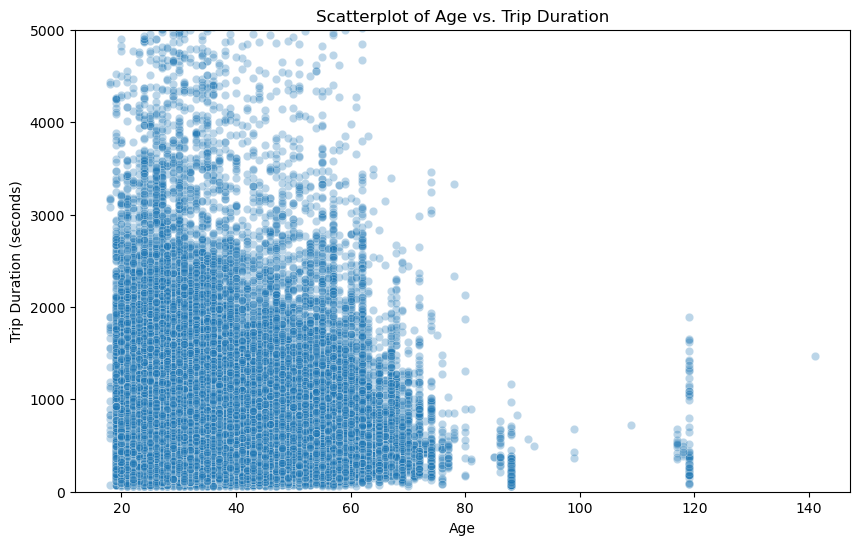

In [15]:
# Scatterplot: Age vs Trip Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration_sec', alpha=0.3)
plt.title('Scatterplot of Age vs. Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration (seconds)')
plt.ylim([0, 5000])  # Focus on trips with duration less than 5000 seconds

**Key Observations**:
- Most users, regardless of age, tend to take shorter trips (under 1000 seconds).
- Younger users (20–40 years old) are more frequent bike users, as indicated by the denser concentration of points.
- There are some anomalous data points for users over 100 years old, likely indicating data entry errors.

---

#### **4. How do trip durations vary by gender and user type?**

Next, we looked at how trip durations differ across **user types** and **genders** using a facet plot.

Text(0.5, 0.98, 'Trip Duration by Gender and User Type')

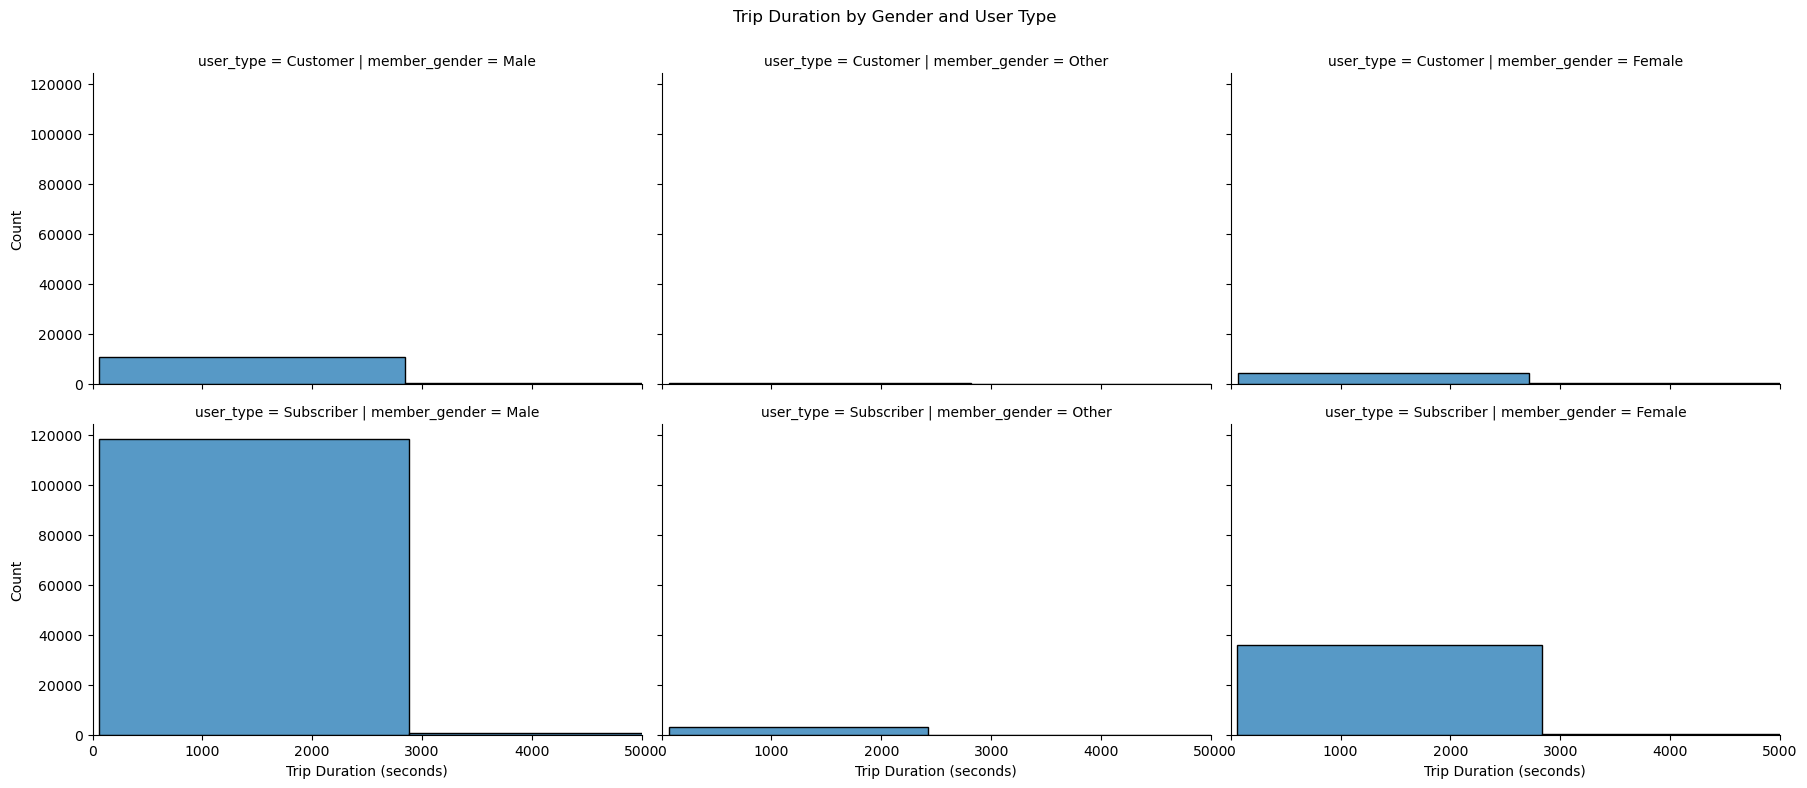

In [16]:
# FacetGrid: Trip Duration by Gender and User Type
g = sns.FacetGrid(df, col="member_gender", row="user_type", height=4, aspect=1.5)
g.map(sns.histplot, "duration_sec", bins=30)
g.set_axis_labels("Trip Duration (seconds)", "Count")
g.set(xlim=(0, 5000))  # Focus on trips with duration less than 5000 seconds
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trip Duration by Gender and User Type')

**Key Observations**:
- **Male Subscribers** take the most trips, and most of these trips are under 1000 seconds.
- **Female Customers** take fewer trips than Male Customers, but their trip durations tend to be slightly longer on average.
- **Subscribers**, across all genders, tend to have shorter trips than Customers, which could indicate more frequent but shorter usage (e.g., for commuting).

---

### **Concluding Insights**

This explanatory analysis of the **Ford GoBike** dataset reveals several key trends:

1. **Subscribers** tend to take shorter trips on average than **Customers**.
2. There is a **significant gender imbalance** in bike usage, with the majority of users being male.
3. **Age** does not have a strong direct correlation with trip duration, but younger users (20–40) tend to take more trips.
4. **Subscribers** generally take shorter trips across all genders, while **Customers** show more variability in trip duration, especially among males and females.

This analysis provides a clear understanding of how different user types and demographics interact with the bike-sharing system, highlighting areas such as gender imbalance and customer behavior that could inform business or operational strategies for Ford GoBike.

---

### **Next Steps**
- Investigate potential reasons for the gender imbalance and explore strategies to increase female user participation.
- Analyze how seasonal or weather data could affect trip durations or user behavior.